# Crop images for segmentation

### Save images and masks in a structured format


In [49]:
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [50]:
dataset = "train"

In [51]:
image_folder = f"../data/cbis-ddsm/{dataset}/images/"
mask_folder = f"../data/cbis-ddsm/{dataset}/masks/"

image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(".png")])

data = {}

for index, img_file in enumerate(image_files):
    img_path = os.path.join(image_folder, img_file)
    image = Image.open(img_path)

    mask_pattern = os.path.join(
        mask_folder, f"{os.path.splitext(img_file)[0]}_mass_*.png"
    )
    mask_files = sorted(glob.glob(mask_pattern))
    masks = [Image.open(mask_file) for mask_file in mask_files]
    data[img_file] = (image, masks)

print(len(data.keys()))

2353


### Check masks for image


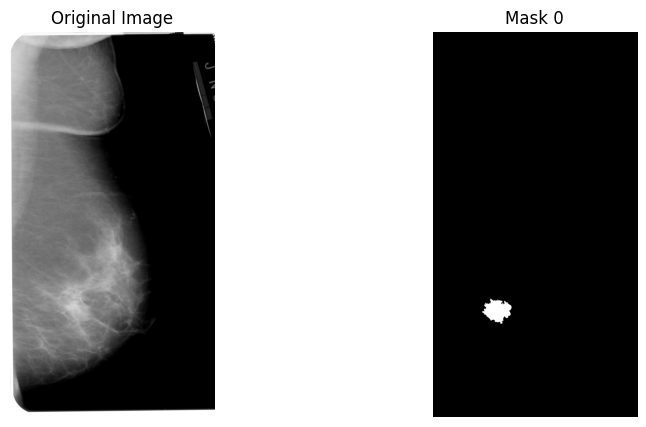

In [52]:
image, masks = data[list(data.keys())[4]]

num_subplots = 1 + len(masks)

# Create figure
fig, axes = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

# Show original image
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show masks
for i, mask in enumerate(masks):
    axes[i + 1].imshow(mask, cmap="gray")
    axes[i + 1].set_title(f"Mask {i}")
    axes[i + 1].axis("off")

plt.show()

### Crop images to masks


In [53]:
def crop_image_to_mask(image, mask, min_padding=50, max_padding=300):
    mask_array = np.array(mask)

    # Find nonzero (white) pixels
    y_indices, x_indices = np.where(mask_array > 0)

    if len(y_indices) == 0 or len(x_indices) == 0:
        return image

    # Get bounding box
    x_min, x_max = x_indices.min(), x_indices.max()
    y_min, y_max = y_indices.min(), y_indices.max()

    paddings = [np.random.randint(min_padding, max_padding) for _ in range(4)]
    x_min = max(x_min - paddings[0], 0)
    x_max = min(x_max + paddings[1], image.width)
    y_min = max(y_min - paddings[2], 0)
    y_max = min(y_max + paddings[3], image.height)

    # Crop the image
    cropped_image = image.crop((x_min, y_min, x_max, y_max))
    cropped_mask = mask.crop((x_min, y_min, x_max, y_max))
    return cropped_image, cropped_mask

### Check crop result


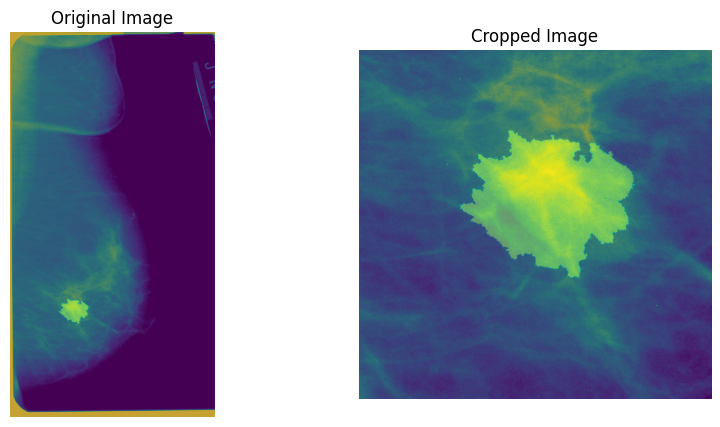

In [54]:
image, masks = data[list(data.keys())[4]]

for mask in masks:
    cropped_image, cropped_mask = crop_image_to_mask(image, mask)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image)
    axes[0].imshow(mask, alpha=0.3)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(cropped_image)
    axes[1].imshow(cropped_mask, alpha=0.3)
    axes[1].set_title("Cropped Image")
    axes[1].axis("off")

    plt.show()